In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import torch
import glob
import os
import pickle
from bs4 import BeautifulSoup
# data_path = '/Users/ruchiraravishankar/Downloads/iam_dataset/'
data_path = '/content/drive/MyDrive/iam_dataset/'

In [3]:
path = data_path + 'xml/*'
xml_path = glob.glob(path)
print(len(xml_path))

1539


In [5]:


d_i = {}
def get_form_metadata(file):
    with open(file, 'r') as f:
        data = f.read()
    Bs_data = BeautifulSoup(data, "lxml")
    form = Bs_data.find('form')
    form_id = form.get('id')
    writer_id = form.get('writer-id')
#     print(form_id)
#     print(writer_id)
    # d[writer_id] = form_id
    d_i[form_id] = writer_id

for file in xml_path:
    get_form_metadata(file)
    

print(d_i)


{'e01-059': '213', 'e01-081': '214', 'e01-086': '214', 'e01-102': '215', 'e01-092': '215', 'e01-107': '216', 'e01-113': '216', 'e02-000': '218', 'e02-014': '219', 'e01-119': '217', 'e02-018': '220', 'e02-025': '222', 'e02-021': '221', 'e02-082': '224', 'e02-074': '223', 'e02-091': '226', 'e02-086': '225', 'e02-100': '228', 'e02-094': '227', 'e02-117': '229', 'e04-000': '158', 'e04-004': '230', 'e04-008': '230', 'e04-011': '231', 'e04-019': '232', 'e04-022': '232', 'e04-015': '231', 'e04-030': '233', 'e04-026': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-062': '237', 'e04-058': '236', 'e04-068': '237', 'e04-079': '238', 'e04-083': '239', 'e04-095': '241', 'e04-086': '240', 'e04-091': '241', 'e04-103': '242', 'e04-099': '241', 'e04-109': '242', 'e04-114': '242', 'e04-119': '243', 'e04-127': '243', 'e04-124': '243', 'e06-000': '206', 'e04-132': '241', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [10]:
b_file = open(data_path + "d_i.pkl", "wb")
pickle.dump(d_i, b_file)
b_file.close()

In [11]:
print(os.listdir(os.curdir))

['.config', 'drive', 'sample_data']


In [12]:
b_file = open(data_path + "d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-059': '213', 'e01-081': '214', 'e01-086': '214', 'e01-102': '215', 'e01-092': '215', 'e01-107': '216', 'e01-113': '216', 'e02-000': '218', 'e02-014': '219', 'e01-119': '217', 'e02-018': '220', 'e02-025': '222', 'e02-021': '221', 'e02-082': '224', 'e02-074': '223', 'e02-091': '226', 'e02-086': '225', 'e02-100': '228', 'e02-094': '227', 'e02-117': '229', 'e04-000': '158', 'e04-004': '230', 'e04-008': '230', 'e04-011': '231', 'e04-019': '232', 'e04-022': '232', 'e04-015': '231', 'e04-030': '233', 'e04-026': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-062': '237', 'e04-058': '236', 'e04-068': '237', 'e04-079': '238', 'e04-083': '239', 'e04-095': '241', 'e04-086': '240', 'e04-091': '241', 'e04-103': '242', 'e04-099': '241', 'e04-109': '242', 'e04-114': '242', 'e04-119': '243', 'e04-127': '243', 'e04-124': '243', 'e06-000': '206', 'e04-132': '241', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [13]:
from collections import Counter

top_writers = []
num_writers = 50 # taking the top 50 writers
writers_counter = Counter(d_i.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers)

['000', '384', '551', '552', '588', '635', '670', '671', '150', '152', '151', '153', '154', '334', '333', '336', '337', '338', '340', '339', '341', '343', '342', '345', '344', '346', '347', '348', '349', '634', '155', '332', '335', '315', '118', '415', '209', '085', '567', '206', '202', '204', '203', '205', '207', '208', '247', '248', '273', '274']


In [14]:
top_forms = []
for form_id, author_id in d_i.items():
    if author_id in top_writers:
        top_forms.append(form_id)
print(top_forms)

['e06-000', 'e06-006', 'e06-003', 'e06-021', 'e06-010', 'e06-015', 'e06-030', 'e06-026', 'e06-037', 'e06-033', 'e06-041', 'e06-046', 'e06-049', 'e06-053', 'e06-070', 'e07-000', 'e07-079', 'e07-076', 'e07-086', 'e07-083', 'e07-094', 'e07-090', 'e07-101', 'e07-105', 'e07-098', 'e07-108', 'f04-007', 'f04-020', 'g03-049', 'g04-007', 'g04-011', 'g04-014', 'g04-017', 'g04-026', 'g04-032', 'g04-095', 'g06-011a', 'g05-098', 'g06-011c', 'g06-011b', 'g06-011e', 'g06-011f', 'g06-011g', 'g06-011i', 'g06-011h', 'g06-011j', 'g06-011l', 'g06-011k', 'g06-011n', 'g06-011m', 'g06-011o', 'g06-011p', 'g06-018a', 'g06-011r', 'g06-018c', 'g06-018b', 'g06-018d', 'g06-018f', 'g06-018g', 'g06-018e', 'g06-018i', 'g06-018h', 'g06-018j', 'g06-018k', 'g06-018l', 'g06-018m', 'g06-018n', 'g06-018r', 'g06-018o', 'g06-018p', 'g06-026b', 'g06-026a', 'g06-026e', 'g06-026c', 'g06-026d', 'g06-026g', 'g06-026f', 'g06-026h', 'g06-026i', 'g06-026k', 'g06-026l', 'g06-026j', 'g06-026n', 'g06-026m', 'g06-026o', 'g06-026p', 'g06

In [15]:
import os
import glob
import shutil

temp_sentences_path = data_path + "temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    original_sentences_path = data_path + "sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

In [16]:
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])
#             sentence_dict[d_i[form_id]] = form_id

[]
[]


In [17]:
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['340', '344', '335', '348', '341', '345', '338', '346', '334', '337', '333', '342', '339', '347', '332', '336', '343', '349', '552', '551', '000', '567', '635', '671', '670', '415', '384', '273', '274', '118', '209', '205', '203', '208', '207', '204', '202', '206', '588', '085', '315', '248', '247', '150', '155', '152', '151', '153', '154', '634'])
dict_values([83, 99, 71, 87, 101, 107, 80, 105, 89, 75, 104, 95, 91, 86, 82, 82, 81, 84, 127, 129, 693, 87, 95, 129, 116, 87, 117, 45, 45, 52, 71, 55, 43, 53, 56, 60, 63, 50, 133, 54, 73, 54, 60, 104, 95, 101, 99, 111, 108, 134])


In [18]:
sen_dict = {}

for i in range(len(img_targets)):
    if img_targets[i] not in sen_dict.keys():
        sen_dict[img_targets[i]] = [img_files[i]]
    else:
        sen_dict[img_targets[i]].append(img_files[i])

In [19]:
print(len(sen_dict['207']))

56


In [20]:
# print(len(sen_dict.values()))
number_of = []
writer_ids = []
for key, value in sorted(sen_dict.items()):
    writer_ids.append(key)
    number_of.append(len([item for item in value if item]))
print(len(writer_ids))

50


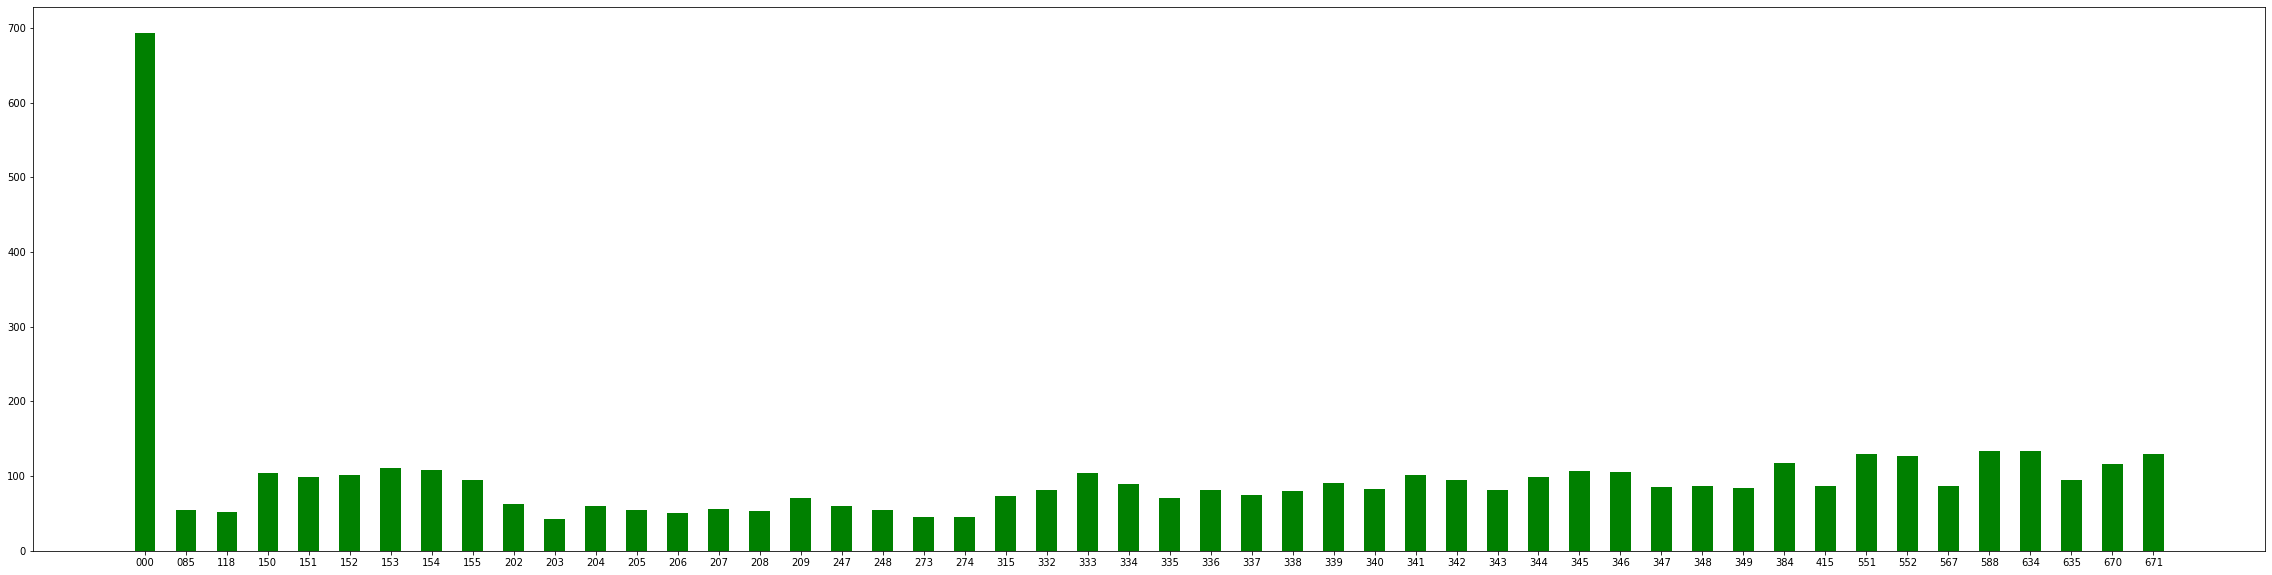

In [21]:
# crop so all images are of same size
# plot histogram 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(40,10))
plt.bar(writer_ids, number_of, width=0.5, color='g')
plt.show()

(85, 1766)
(81, 1774)


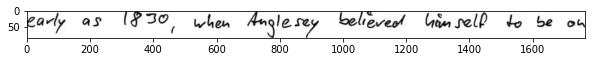

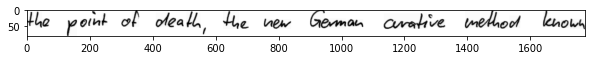

In [22]:
for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')
    print(img.shape)

In [23]:
writer_0_files = np.array(sen_dict['000'][:500])
print(writer_0_files.shape)

writer_0 = np.c_[writer_0_files, np.zeros(500)]

print(writer_0.shape)

(500,)
(500, 2)


In [24]:
print(writer_0[0])

['/content/drive/MyDrive/testing_proj/iam_dataset//temp_sentences/a05-000-s00-00.png'
 '0.0']


In [25]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [26]:
np.save(data_path + "labelled_data.npy", labelled_data)